In [34]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import kagglehub

import hdbscan

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

In [35]:
# Define the dataset path
dataset_path = "/Users/Dataghost/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1/Mall_Customers.csv"

df = pd.read_csv(dataset_path, encoding="ISO-8859-1")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
# Selecting relevant numerical features

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [37]:
# Standardize data (important for DBSCAN)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Step 2: Apply DBSCAN

In [38]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X_scaled)

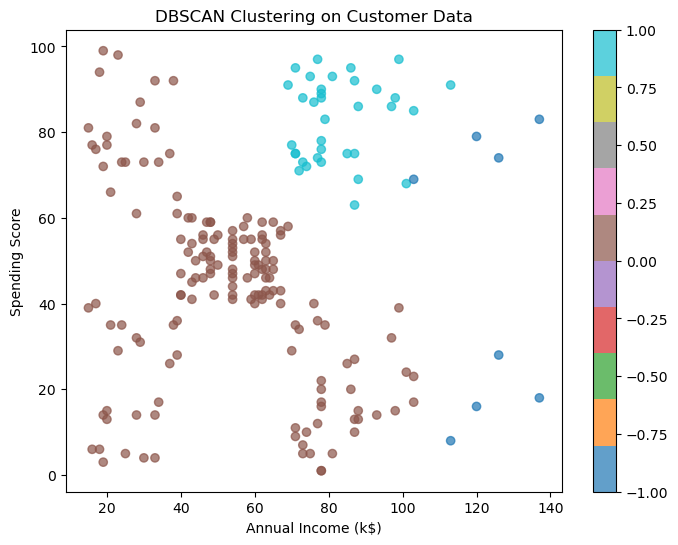

In [39]:
# Plot results

plt.figure(figsize=(8,6))

plt.scatter(X['Annual Income (k$)'], 
            X['Spending Score (1-100)'], 
            c=dbscan_labels, 
            cmap='tab10', 
            alpha=0.7
            
            )

plt.title("DBSCAN Clustering on Customer Data")

plt.xlabel("Annual Income (k$)")

plt.ylabel("Spending Score")

plt.colorbar(label='')

plt.show()

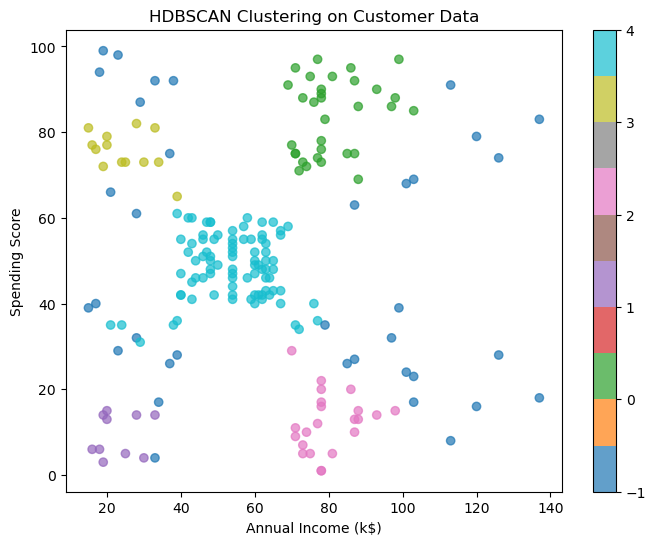

In [40]:
# Apply HDBSCAN

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)

hdb_labels = hdb.fit_predict(X_scaled)

# Plot results
plt.figure(figsize=(8,6))

plt.scatter(X['Annual Income (k$)'], 
            X['Spending Score (1-100)'], 
            c=hdb_labels, 
            cmap='tab10', 
            alpha=0.7
            
            )
plt.title("HDBSCAN Clustering on Customer Data")

plt.xlabel("Annual Income (k$)")

plt.ylabel("Spending Score")

plt.colorbar()

plt.show()


Step 4: Compare Results

In [41]:
print(f'DBSCAN Found {len(set(dbscan_labels))-(1 if -1 in dbscan_labels else 0 )} clusters')

print(f'HDBSCAN Found {len(set(hdb_labels))-(1 if -1 in hdb_labels else 0 )} clusters')

DBSCAN Found 2 clusters
HDBSCAN Found 5 clusters


DBSCAN struggles if eps is not well-tuned (can over-cluster or under-cluster).
HDBSCAN automatically finds better clusters and detects outliers more accurately.